# **1. INSTAL & IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import torch
from tqdm.notebook import tqdm

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [2]:
# Install library Sastrawi
!pip -q install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 4.9 MB/s eta 0:00:00


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **1. Data Acquistion**

Mendownload dataset dari github

In [4]:
!wget https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_opini_film.csv

--2023-04-10 09:58:44--  https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_opini_film.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22687 (22K) [text/plain]
Saving to: ‘dataset_tweet_sentiment_opini_film.csv’

dataset_tweet_senti 100%[===================>]  22.16K  --.-KB/s    in 0.001s  

2023-04-10 09:58:44 (18.1 MB/s) - ‘dataset_tweet_sentiment_opini_film.csv’ saved [22687/22687]



In [5]:
data = pd.read_csv('dataset_tweet_sentiment_opini_film.csv')
data.head()

,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


In [6]:
data.tail()

,Id,Sentiment,Text Tweet
195,196,positive,Fargo juga adaptasi dari film yang cukup berha...
196,197,positive,637.000 waw ini sangat keren flm horor dng jum...
197,198,positive,@filmziarah film yang tenang dan menghanyutkan...
198,199,positive,Film yg amat menarik. Kisah cinta & kesetiaan ...
199,200,positive,"Nntn @filmziarah , film bagus, ada kali 5 meni..."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          200 non-null    int64 
 1   Sentiment   200 non-null    object
 2   Text Tweet  200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [8]:
print('Total Jumlah opini film:', data.shape[0], 'data\n')
print('terdiri dari (Sentiment):')
print('-- [1] Opini film positif\t:', data[data.Sentiment == 'positive'].shape[0], 'data')
print('-- [2] opini film negatif\t:', data[data.Sentiment == 'positive'].shape[0], 'data')

Total Jumlah opini film: 200 data

terdiri dari (Sentiment):
-- [1] Opini film positif	: 100 data
-- [2] opini film negatif	: 100 data


In [9]:
def sentiment(teks):
  if teks == 'positive':
    return 1
  if teks == 'negative':
    return 2

In [10]:
data['label']=data['Sentiment'].apply(sentiment)
data

,Id,Sentiment,Text Tweet,label
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...,2
1,2,negative,Film king Arthur ini film paling jelek dari se...,2
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...,2
3,4,negative,Ane ga suka fast and furious..menurutku kok je...,2
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang...",2
...,...,...,...,...
195,196,positive,Fargo juga adaptasi dari film yang cukup berha...,1
196,197,positive,637.000 waw ini sangat keren flm horor dng jum...,1
197,198,positive,@filmziarah film yang tenang dan menghanyutkan...,1
198,199,positive,Film yg amat menarik. Kisah cinta & kesetiaan ...,1


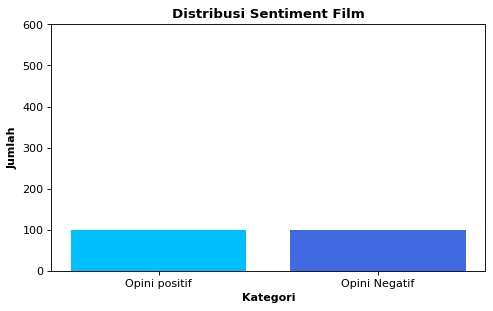

In [11]:
height = data['Sentiment'].value_counts()
labels = ('Opini positif', 'Opini Negatif')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Sentiment Film', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue'])
plt.xticks(y_pos, labels)
plt.show()

# **2. Data Preprocessing**

In [13]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [14]:
raw_sample = data['Text Tweet'].iloc[5]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  tolong editingnya yg bagus ya. Saya sering kecewa dgn film indonesia. Ditunggu filmnya!!
Case folding	:  tolong editingnya yg bagus ya saya sering kecewa dgn film indonesia ditunggu filmnya


**Filtering (Stopword Removal)**

In [15]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [16]:
len(stopwords_ind)

758

In [17]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind[:20]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara']

In [18]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['tsel', 'gb', 'rb']                    # Tambahkan kata lain dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [19]:
raw_sample = data['Text Tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  tolong editingnya yg bagus ya. Saya sering kecewa dgn film indonesia. Ditunggu filmnya!!
Case folding		:  tolong editingnya yg bagus ya saya sering kecewa dgn film indonesia ditunggu filmnya
Stopword removal	:  tolong editingnya yg bagus ya kecewa dgn film indonesia ditunggu filmnya


**Stemming**

In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [21]:
raw_sample = data['Text Tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  tolong editingnya yg bagus ya. Saya sering kecewa dgn film indonesia. Ditunggu filmnya!!
Case folding		:  tolong editingnya yg bagus ya saya sering kecewa dgn film indonesia ditunggu filmnya
Stopword removal	:  tolong editingnya yg bagus ya kecewa dgn film indonesia ditunggu filmnya
Stemming		:  tolong editingnya yg bagus ya kecewa dgn film indonesia tunggu film


**Text Preprocessing Pipeline**

In [22]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [23]:
%%time
data['clean_teks'] = data['Text Tweet'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 55 s, sys: 150 ms, total: 55.2 s
Wall time: 57.4 s


In [24]:
data

,Id,Sentiment,Text Tweet,label,clean_teks
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...,2,jelek film si ernest gak mutu bgt actingnya fi...
1,2,negative,Film king Arthur ini film paling jelek dari se...,2,film king arthur film jelek cerita king arthur
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...,2,beexkuanlin film gwa kasar bapak
3,4,negative,Ane ga suka fast and furious..menurutku kok je...,2,ane ga suka fast and furiousmenurutku jelek ya...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang...",2,baekhyun gua ga tau film nya lu bilang perang ...
...,...,...,...,...,...
195,196,positive,Fargo juga adaptasi dari film yang cukup berha...,1,fargo adaptasi film hasil season nya the best
196,197,positive,637.000 waw ini sangat keren flm horor dng jum...,1,waw keren flm horor dng tonton gin dlm prillyb...
197,198,positive,@filmziarah film yang tenang dan menghanyutkan...,1,filmziarah film tenang hanyut salut mbah ponco...
198,199,positive,Film yg amat menarik. Kisah cinta & kesetiaan ...,1,film yg tarik kisah cinta setia yg saji bikin ...


In [25]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
data.to_csv('clean_data.csv')

# **3. Feature Engineering**

In [26]:
# Pisahkan kolom fitur dan target
X = data['clean_teks']
y = data['label']

In [27]:
X

0      jelek film si ernest gak mutu bgt actingnya fi...
1         film king arthur film jelek cerita king arthur
2                       beexkuanlin film gwa kasar bapak
3      ane ga suka fast and furiousmenurutku jelek ya...
4      baekhyun gua ga tau film nya lu bilang perang ...
                             ...                        
195        fargo adaptasi film hasil season nya the best
196    waw keren flm horor dng tonton gin dlm prillyb...
197    filmziarah film tenang hanyut salut mbah ponco...
198    film yg tarik kisah cinta setia yg saji bikin ...
199    nntn filmziarah film bagus kali menit tonton g...
Name: clean_teks, Length: 200, dtype: object

In [28]:
y

0      2
1      2
2      2
3      2
4      2
      ..
195    1
196    1
197    1
198    1
199    1
Name: label, Length: 200, dtype: int64

**Feature Extraction (TF-IDF & N-Gram)**

Proses mengubah teks menjadi vector menggunakan metode TF-IDF

In [29]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [30]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

878


In [31]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['abis' 'abiss' 'acclaim' 'actingnya' 'action' 'adaptasi' 'adegan' 'aduh'
 'aduk' 'after' 'agam' 'agama' 'ah' 'air' 'aj' 'aja' 'ajaa' 'ajak' 'ajar'
 'akan' 'akhrnya' 'akting' 'aktor' 'aktris' 'ale' 'alf' 'alien' 'alitalit'
 'alur' 'ama' 'amat' 'amazing' 'ambigu' 'amira' 'anak' 'ancur' 'and'
 'andibowooo' 'ane' 'aneh' 'angkat' 'anjak' 'anjlok' 'anya' 'apresiasi'
 'april' 'arah' 'arthur' 'artis' 'asih' 'asik' 'askmenfess' 'asli'
 'astagah' 'aurat' 'awisuryadi' 'baca' 'baekhyun' 'bagus'
 'baguskelompoknya' 'bagussss' 'bahagia' 'bahas' 'bahasa' 'baik' 'baja'
 'balap' 'balik' 'banding' 'bandung' 'bang' 'bangat' 'banget' 'bangetbuat'
 'bangetkalian' 'bangettt' 'bangga' 'banggafilmindonesia' 'bangsa' 'bangt'
 'banyak' 'bapak' 'bareng' 'baru' 'barusan' 'batal' 'batas' 'bawa' 'bawah'
 'bayang' 'bayar' 'bebas' 'beda' 'beexkuanlin' 'begadang' 'belah' 'belang'
 'benar' 'bener' 'benerbener' 'benerseru' 'bentar' 'berat' 'berbudget'
 'berekspektasi' 'berkalikali' 'best' 'besut' 'betapa' 'bewe' 'bg' '

In [32]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,abis,abiss,acclaim,actingnya,action,adaptasi,adegan,aduh,aduk,after,...,worth,ya,yah,yanskii,yaoi,yg,you,youtube,yuk,ziarah
0,0.0,0.0,0.0,0.403277,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.262008,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.237566,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.000000,0.0,0.37323,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.132551,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.283690,0.0,0.0,0.0,0.0


In [34]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

**Feature Selection (Chi Square)**

In [35]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [36]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=100) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 878
Reduced feature number: 100


In [37]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.003708
1,0.247537
2,0.363339
3,0.403277
4,0.033334
...,...
873,0.002344
874,0.286211
875,0.414480
876,0.354978


In [38]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.003708,abis
1,0.247537,abiss
2,0.363339,acclaim
3,0.403277,actingnya
4,0.033334,action
...,...,...
873,0.002344,yg
874,0.286211,you
875,0.414480,youtube
876,0.354978,yuk


In [39]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
396,4.968480,kecewa
359,4.953546,jelek
407,4.725379,keren
307,2.897733,hambar
267,2.564924,ga
...,...,...
117,0.000190,bikin
710,0.000149,selesai
462,0.000089,lo
273,0.000012,gambar


In [40]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False,  True,  True, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [41]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['aja',
 'ajaa',
 'aktor',
 'ale',
 'alien',
 'ama',
 'ane',
 'aneh',
 'angkat',
 'anjlok',
 'anya',
 'arthur',
 'asik',
 'asli',
 'bagus',
 'bahagia',
 'baik',
 'bang',
 'bangga',
 'banggafilmindonesia',
 'belah',
 'berekspektasi',
 'bilang',
 'bs',
 'busuk',
 'cenayangfilm',
 'cinta',
 'coba',
 'cocok',
 'danurmovie',
 'dapat',
 'dapet',
 'deh',
 'erti',
 'filmkartini',
 'filmziarah',
 'ga',
 'getout',
 'gitu',
 'gue',
 'gw',
 'hambar',
 'hambarr',
 'hanungbramantyo',
 'horor',
 'horror',
 'indonesia',
 'inspirasi',
 'isi',
 'jelek',
 'jelekk',
 'jenuh',
 'jijk',
 'judul',
 'kagum',
 'kartini',
 'kecewa',
 'kecewaa',
 'keren',
 'king',
 'komedi',
 'laku',
 'lanjut',
 'laris',
 'layak',
 'legacypictures',
 'lucu',
 'main',
 'mbah',
 'mikir',
 'movie',
 'mummy',
 'murah',
 'mutu',
 'nang',
 'ngehek',
 'nggak',
 'nikmat',
 'nontonnya',
 'norak',
 'novel',
 'nunggu',
 'nyesel',
 'perang',
 'radityadika',
 'ragu',
 'rusak',
 'sahabat',
 'salut',
 'seru',
 'sesal',
 'si',
 'sukses',
 'sump

In [42]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [43]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aja,ajaa,aktor,ale,alien,ama,ane,aneh,angkat,anjlok,...,sesal,si,sukses,sumpah,tarik,tonton,tu,wajib,yah,ziarah
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.374131,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.351585,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.372156,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.208214,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.182745,0.000000,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.254665,0.000000,0.000000,0.0,0.0,0.0


In [44]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

# **4. Modelling (Machine Learning)**

In [45]:
'''
Supervised learning in Sklearn
https://scikit-learn.org/stable/supervised_learning.html
'''
from sklearn.naive_bayes import MultinomialNB           # Pilih salah satu algoritma supervised learning. Contoh ini menggunakan algoritma Naive Bayes
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih

In [46]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur

# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=40)

In [47]:
# Training the model
algorithm = MultinomialNB()               # Load algoritma pembelajaran
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih 

# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [48]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array([2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1])

In [49]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

array([2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1])

# **5. Model Evaluation**

In [50]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 36
Jumlah prediksi salah	: 4
Akurasi pengujian	: 90.0 %


In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[19  2]
 [ 2 17]]


In [52]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

           1       0.90      0.90      0.90        21
           2       0.89      0.89      0.89        19

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [53]:
# Cross Validation

from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.925 0.875 0.875 0.75  0.85  0.85  0.95  0.925 0.875 0.925] 

Rata-rata akurasi pada cross validation: 0.8800000000000001


# **6. Simple Deployment**

In [54]:
from joblib import load

# load model
model = load('model_1.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature.pickle', 'rb'))

In [55]:
#@title Masukkan Teks Anda:
input_text = "film ini menarik tetapi pengambilan gambarnya kurang sesuai" #@param {type:"string"}

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi

print('Hasil Text Preprocessing :', pre_input_text)

if (result==1):
  sms = 'opini positive'
elif (result==2):
  sms = 'opini negative'
else:
  sms = 'SMS Promo'

print('Hasil prediksi', input_text, ' adalah\n', sms)

Hasil Text Preprocessing : film tarik ambil gambar sesuai
Hasil prediksi film ini menarik tetapi pengambilan gambarnya kurang sesuai  adalah
 opini positive


In [56]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [57]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2023-04-10 10:10:57--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.003s  

2023-04-10 10:10:57 (11.9 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [58]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

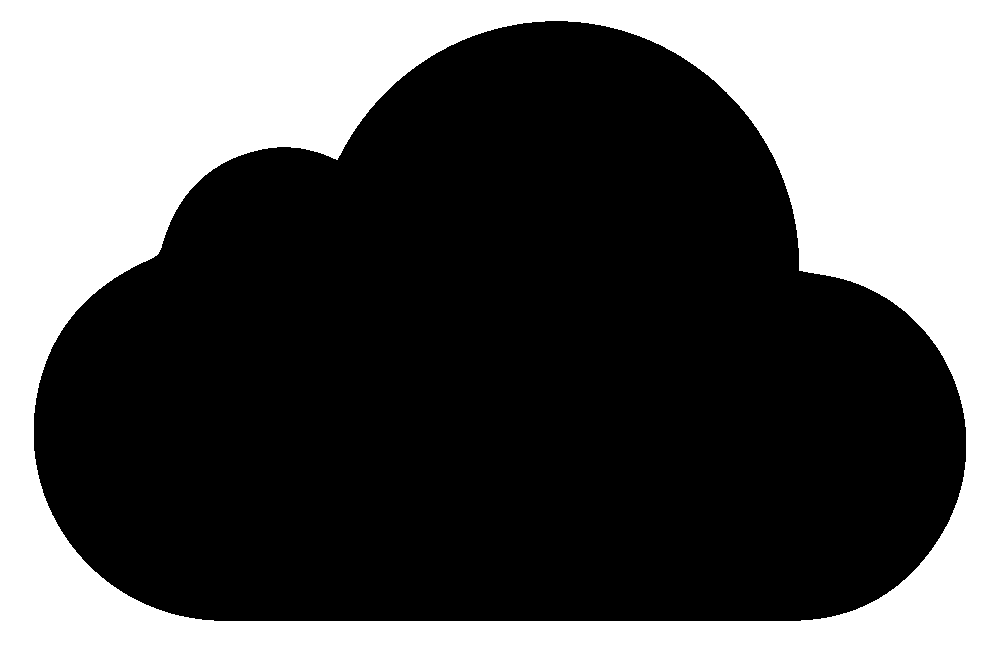

In [59]:
# Tampilkan masking
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

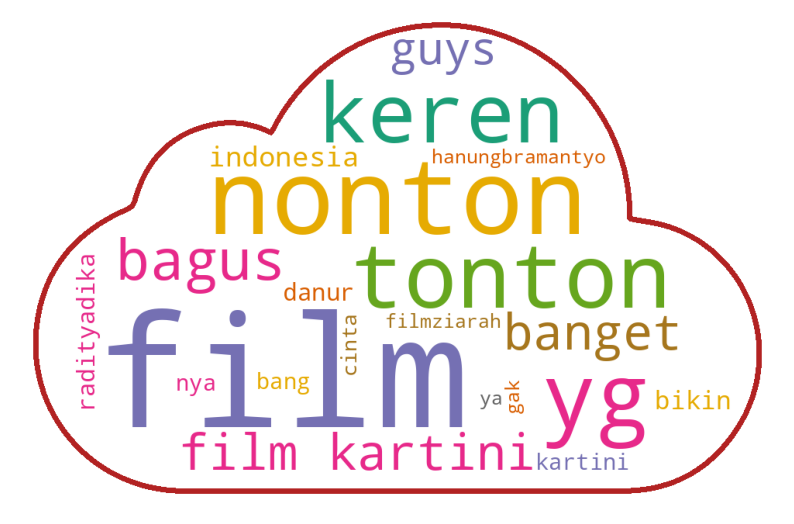

In [60]:
sms_normal = data[data.label == 1]
normal_string = []

for t in sms_normal.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

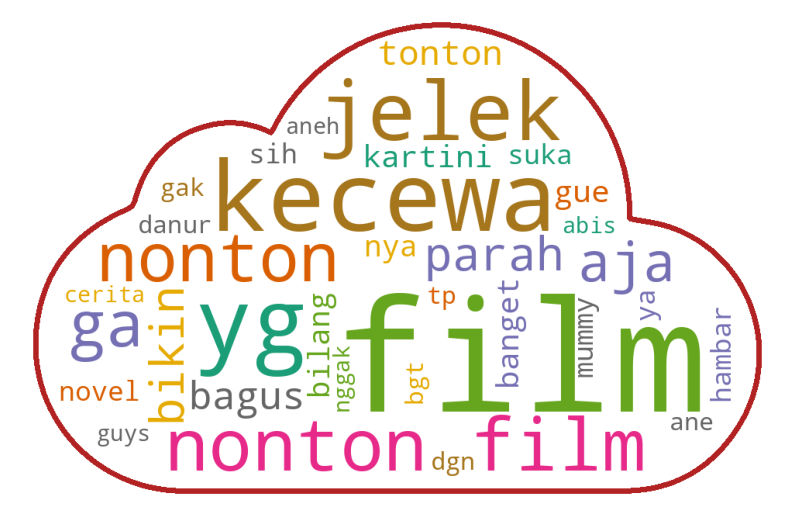

In [61]:
# WordCloud Label opini negatif

sms_fraud = data[data.label == 2]
fraud_string = []

for t in sms_fraud.clean_teks:
  fraud_string.append(t)

fraud_string = pd.Series(fraud_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(fraud_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()